# Prediction PM2.5 by regression(แบบดึงตัวแปรอื่นที่เกี่ยวข้องจาก air4thai ลงมาใน future_data)

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [348]:
df = pd.read_csv('air4thai_44t_2024-02-01_2024-02-29.csv')
del df['Unnamed: 0']
df

,DATETIMEDATA,PM25,O3,WS,TEMP,RH,WD
0,2024-02-01 00:00:00,19.6,1.0,0,26,82,110
1,2024-02-01 01:00:00,19.2,12.0,0,26,85,108
2,2024-02-01 02:00:00,19.0,9.0,0,26,86,106
3,2024-02-01 03:00:00,17.8,1.0,0,25,88,111
4,2024-02-01 04:00:00,13.8,0.0,0,25,89,116
...,...,...,...,...,...,...,...
691,2024-02-29 19:00:00,23.4,NaN,1,29,70,116
692,2024-02-29 20:00:00,21.8,0.0,1,29,71,151
693,2024-02-29 21:00:00,25.1,0.0,1,28,71,143
694,2024-02-29 22:00:00,19.5,1.0,1,28,71,120


## Clean data

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATETIMEDATA  696 non-null    object 
 1   PM25          683 non-null    float64
 2   O3            572 non-null    float64
 3   WS            696 non-null    int64  
 4   TEMP          696 non-null    int64  
 5   RH            696 non-null    int64  
 6   WD            696 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 38.2+ KB


In [350]:
df.dtypes

DATETIMEDATA     object
PM25            float64
O3              float64
WS                int64
TEMP              int64
RH                int64
WD                int64
dtype: object

In [351]:
df['DATETIMEDATA'] = pd.to_datetime(df['DATETIMEDATA'])

In [352]:
df.set_index('DATETIMEDATA',
            drop=True,
            inplace=True)

In [353]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 696 entries, 2024-02-01 00:00:00 to 2024-02-29 23:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM25    696 non-null    float64
 1   O3      696 non-null    float64
 2   WS      696 non-null    int64  
 3   TEMP    696 non-null    int64  
 4   RH      696 non-null    int64  
 5   WD      696 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 38.1 KB


In [354]:
df

,PM25,O3,WS,TEMP,RH,WD
DATETIMEDATA,,,,,,
2024-02-01 00:00:00,19.6,1.000000,0,26,82,110
2024-02-01 01:00:00,19.2,12.000000,0,26,85,108
2024-02-01 02:00:00,19.0,9.000000,0,26,86,106
2024-02-01 03:00:00,17.8,1.000000,0,25,88,111
2024-02-01 04:00:00,13.8,0.000000,0,25,89,116
...,...,...,...,...,...,...
2024-02-29 19:00:00,23.4,10.568182,1,29,70,116
2024-02-29 20:00:00,21.8,0.000000,1,29,71,151
2024-02-29 21:00:00,25.1,0.000000,1,28,71,143


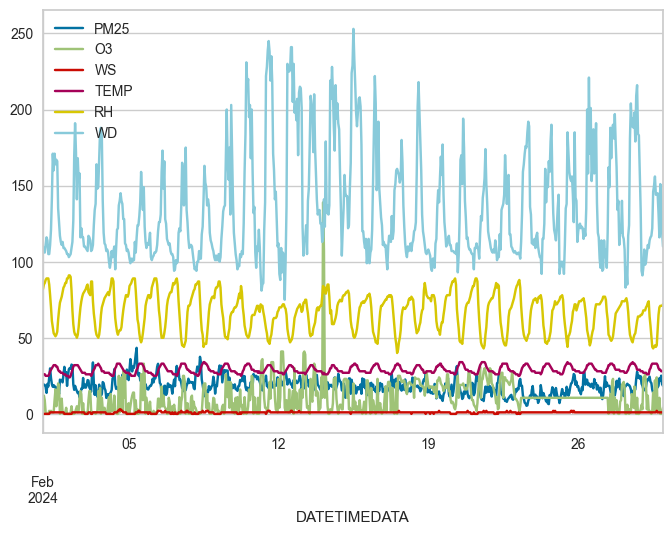

In [355]:
df.plot()
plt.show()

# save clean_data

In [356]:
data = df
data.to_csv('clean_data_2024-02-01_2024-02-29.csv', index=True)

## Create Train and Test data

In [357]:
data.columns

Index(['PM25', 'O3', 'WS', 'TEMP', 'RH', 'WD'], dtype='object')

In [358]:
col = data[data.columns[0]].count()
test = data.sample(int(0.3*col), random_state=20)
train = data.drop(test.index)

In [359]:
train.shape, test.shape

((488, 6), (208, 6))

In [360]:
train

,PM25,O3,WS,TEMP,RH,WD
DATETIMEDATA,,,,,,
2024-02-01 00:00:00,19.6,1.0,0,26,82,110
2024-02-01 02:00:00,19.0,9.0,0,26,86,106
2024-02-01 04:00:00,13.8,0.0,0,25,89,116
2024-02-01 05:00:00,19.7,0.0,0,25,89,114
2024-02-01 06:00:00,18.0,0.0,0,25,89,105
...,...,...,...,...,...,...
2024-02-29 15:00:00,14.9,2.0,1,33,44,144
2024-02-29 20:00:00,21.8,0.0,1,29,71,151
2024-02-29 21:00:00,25.1,0.0,1,28,71,143


In [361]:
test

,PM25,O3,WS,TEMP,RH,WD
DATETIMEDATA,,,,,,
2024-02-28 04:00:00,17.8,17.000000,1,27,74,108
2024-02-19 08:00:00,19.0,18.000000,1,29,71,112
2024-02-27 08:00:00,20.6,10.568182,1,29,67,96
2024-02-18 08:00:00,22.2,10.568182,1,29,68,120
2024-02-01 10:00:00,19.5,1.000000,1,30,61,142
...,...,...,...,...,...,...
2024-02-14 22:00:00,20.9,6.000000,1,28,74,134
2024-02-02 10:00:00,19.3,0.000000,1,31,59,127
2024-02-02 11:00:00,15.8,0.000000,1,32,54,169


## Setup data 

In [362]:
from pycaret.regression import *
s = setup(data=train,
        test_data=test, 
        target='PM25',
        session_id=123)

,Description,Value
0,Session id,123
1,Target,PM25
2,Target type,Regression
3,Original data shape,"(696, 6)"
4,Transformed data shape,"(696, 6)"
5,Transformed train set shape,"(488, 6)"
6,Transformed test set shape,"(208, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


## Compare_model

In [363]:
best = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.8701,24.4611,4.8298,-0.1763,0.2580,0.2384,0.0090
br,Bayesian Ridge,3.9531,25.3086,4.9065,-0.1971,0.2685,0.2496,0.0030
lasso,Lasso Regression,3.9584,25.3137,4.9098,-0.1994,0.2681,0.2501,0.0030
llar,Lasso Least Angle Regression,3.9584,25.3138,4.9098,-0.1994,0.2681,0.2501,0.0050
en,Elastic Net,3.9599,25.3685,4.9151,-0.2029,0.2689,0.2500,0.0040
ada,AdaBoost Regressor,3.9641,25.7562,4.9231,-0.1862,0.2641,0.2555,0.0060
et,Extra Trees Regressor,3.9659,25.7393,4.9149,-0.1839,0.2621,0.2407,0.0180
ridge,Ridge Regression,3.9732,25.8411,4.9434,-0.2163,0.2713,0.2496,0.0030
lr,Linear Regression,3.9733,25.8455,4.9438,-0.2165,0.2713,0.2496,0.0030
huber,Huber Regressor,3.9807,26.1318,4.9618,-0.2309,0.2740,0.2471,0.0040


In [364]:
best

GradientBoostingRegressor(random_state=123)

In [365]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

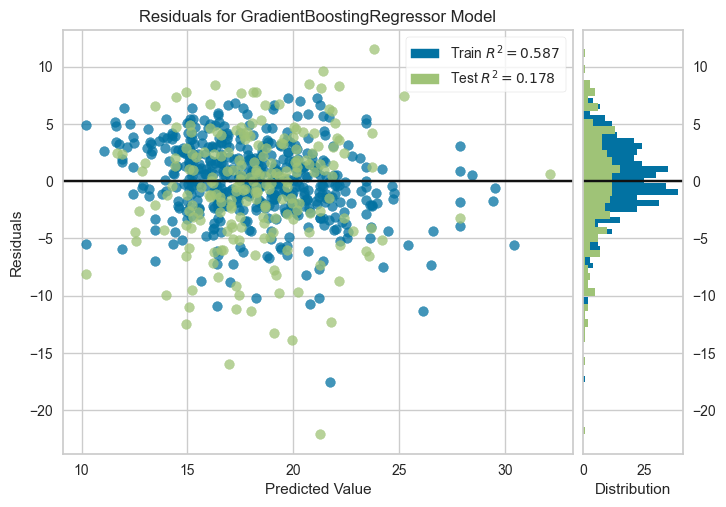

In [366]:
plot_model(best, plot = 'residuals')

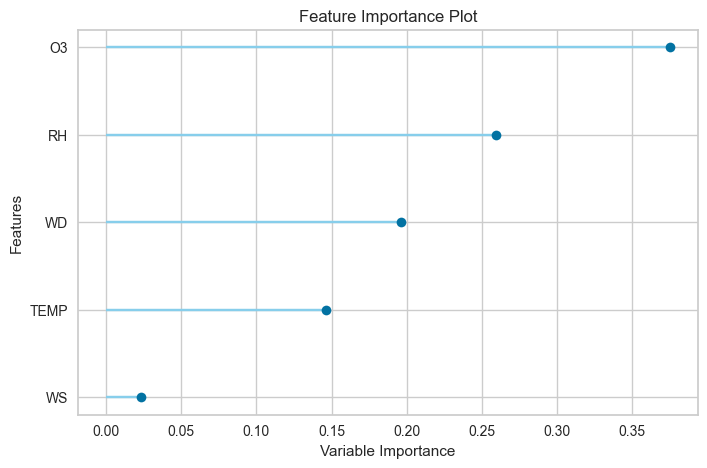

In [367]:
plot_model(best, plot = 'feature')

## Predict_model

In [368]:
pre = predict_model(best)
pre

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3.9136,26.6368,5.1611,0.1782,0.2601,0.2217


,O3,WS,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,,
2024-02-28 04:00:00,17.000000,1,27,74,108,17.799999,17.300515
2024-02-19 08:00:00,18.000000,1,29,71,112,19.000000,18.724439
2024-02-27 08:00:00,10.568182,1,29,67,96,20.600000,17.495916
2024-02-18 08:00:00,10.568182,1,29,68,120,22.200001,17.170644
2024-02-01 10:00:00,1.000000,1,30,61,142,19.500000,18.843259
...,...,...,...,...,...,...,...
2024-02-14 22:00:00,6.000000,1,28,74,134,20.900000,18.667022
2024-02-02 10:00:00,0.000000,1,31,59,127,19.299999,20.140730
2024-02-02 11:00:00,0.000000,1,32,54,169,15.800000,18.709545


In [369]:
predictions = predict_model(best, data=data)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.9816,15.8854,3.9856,0.4515,0.2109,0.1784


,O3,WS,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,,
2024-02-01 00:00:00,1.000000,0,26,82,110,19.600000,19.754436
2024-02-01 01:00:00,12.000000,0,26,85,108,19.200001,18.292944
2024-02-01 02:00:00,9.000000,0,26,86,106,19.000000,20.891346
2024-02-01 03:00:00,1.000000,0,25,88,111,17.799999,25.224929
2024-02-01 04:00:00,0.000000,0,25,89,116,13.800000,17.482489
...,...,...,...,...,...,...,...
2024-02-29 19:00:00,10.568182,1,29,70,116,23.400000,16.220661
2024-02-29 20:00:00,0.000000,1,29,71,151,21.799999,21.701054
2024-02-29 21:00:00,0.000000,1,28,71,143,25.100000,21.701054


In [370]:
fig = px.line(predictions, x=predictions.index, y=['PM25','prediction_label'], template = 'plotly_dark', title='PM25 vs Prediction Label')
fig.show()

In [371]:
final_best = finalize_model(best)

In [372]:
predictions_final = predict_model(final_best, data=data)
predictions_final

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.8872,14.4851,3.8059,0.4999,0.2048,0.1760


,O3,WS,TEMP,RH,WD,PM25,prediction_label
DATETIMEDATA,,,,,,,
2024-02-01 00:00:00,1.000000,0,26,82,110,19.600000,20.118669
2024-02-01 01:00:00,12.000000,0,26,85,108,19.200001,18.064941
2024-02-01 02:00:00,9.000000,0,26,86,106,19.000000,19.596720
2024-02-01 03:00:00,1.000000,0,25,88,111,17.799999,23.332520
2024-02-01 04:00:00,0.000000,0,25,89,116,13.800000,18.906046
...,...,...,...,...,...,...,...
2024-02-29 19:00:00,10.568182,1,29,70,116,23.400000,18.112512
2024-02-29 20:00:00,0.000000,1,29,71,151,21.799999,22.163082
2024-02-29 21:00:00,0.000000,1,28,71,143,25.100000,21.601277


In [373]:
fig = px.line(predictions_final, x=predictions_final.index, y=['PM25','prediction_label'], template = 'plotly_dark', title='PM25 vs Prediction Label')
fig.show()

### สร้าง future_data เพื่อพยากรณ์ข้อมูลในอีก 7 วันข้างหน้า โดยดึงข้อมูลในตัวแปรอื่น ๆ จาก air4thai เพื่อนำมาเทียบค่า prediction และนำค่า PM25 ของจริงมาเปรียบเทียบเพื่อดูความแตกต่างด้วย

In [374]:
future_data = pd.read_csv('air4thai_44t_2024-03-01_2024-03-07.csv')
del future_data['Unnamed: 0']
future_data

,DATETIMEDATA,O3,WS,TEMP,RH,WD
0,2024-03-01 00:00:00,5.0,1,28,72,111
1,2024-03-01 01:00:00,17.0,1,28,74,108
2,2024-03-01 02:00:00,18.0,2,28,77,117
3,2024-03-01 03:00:00,19.0,1,27,78,112
4,2024-03-01 04:00:00,9.0,1,27,78,103
...,...,...,...,...,...,...
163,2024-03-07 19:00:00,11.0,1,30,64,109
164,2024-03-07 20:00:00,7.0,1,30,67,106
165,2024-03-07 21:00:00,1.0,1,29,69,104
166,2024-03-07 22:00:00,2.0,1,29,74,95


In [375]:
future_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATETIMEDATA  168 non-null    object 
 1   O3            162 non-null    float64
 2   WS            168 non-null    int64  
 3   TEMP          168 non-null    int64  
 4   RH            168 non-null    int64  
 5   WD            168 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 8.0+ KB


In [376]:
future_data['DATETIMEDATA'] = pd.to_datetime(future_data['DATETIMEDATA'])

In [377]:
future_data.set_index('DATETIMEDATA',
            drop=True,
            inplace=True)

In [378]:
future_data.fillna(future_data.mean(numeric_only=True), inplace=True)
future_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2024-03-01 00:00:00 to 2024-03-07 23:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   O3      168 non-null    float64
 1   WS      168 non-null    int64  
 2   TEMP    168 non-null    int64  
 3   RH      168 non-null    int64  
 4   WD      168 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 7.9 KB


In [379]:
future_data

,O3,WS,TEMP,RH,WD
DATETIMEDATA,,,,,
2024-03-01 00:00:00,5.0,1,28,72,111
2024-03-01 01:00:00,17.0,1,28,74,108
2024-03-01 02:00:00,18.0,2,28,77,117
2024-03-01 03:00:00,19.0,1,27,78,112
2024-03-01 04:00:00,9.0,1,27,78,103
...,...,...,...,...,...
2024-03-07 19:00:00,11.0,1,30,64,109
2024-03-07 20:00:00,7.0,1,30,67,106
2024-03-07 21:00:00,1.0,1,29,69,104


In [380]:
predictions_future = predict_model(final_best, data=future_data)
predictions_future

,O3,WS,TEMP,RH,WD,prediction_label
DATETIMEDATA,,,,,,
2024-03-01 00:00:00,5.0,1,28,72,111,20.055155
2024-03-01 01:00:00,17.0,1,28,74,108,17.300070
2024-03-01 02:00:00,18.0,2,28,77,117,17.663336
2024-03-01 03:00:00,19.0,1,27,78,112,17.167521
2024-03-01 04:00:00,9.0,1,27,78,103,20.308558
...,...,...,...,...,...,...
2024-03-07 19:00:00,11.0,1,30,64,109,19.213254
2024-03-07 20:00:00,7.0,1,30,67,106,20.507846
2024-03-07 21:00:00,1.0,1,29,69,104,23.829126


In [381]:
concat_df = pd.concat([data,predictions_future], axis=0)
fig = px.line(concat_df, x=concat_df.index, y=["PM25", "prediction_label"], template = 'plotly_dark')
fig.show()

In [382]:
save_model(final_best, 'my_final_best_regression_reality_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['O3', 'WS', 'TEMP', 'RH', 'WD'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator',
                  GradientBoostingRegressor(random_state=123))]),
 'my_final_best_regression_reality_model.pkl')

In [383]:
loaded_model = load_model('my_final_best_regression_reality_model')

Transformation Pipeline and Model Successfully Loaded


# Save Predict future_data to csv

In [384]:
future_data.to_csv('modelpm25_regression_real.csv', index=True)